In [1]:
# 노이즈가 포함된 이미지를 복원

In [2]:
import torch
import pickle
shp_original_img = (100, 100)
broken_image = torch.FloatTensor(pickle.load(open('../../data/broken_image_t.p', 'rb'), encoding='latin1'))

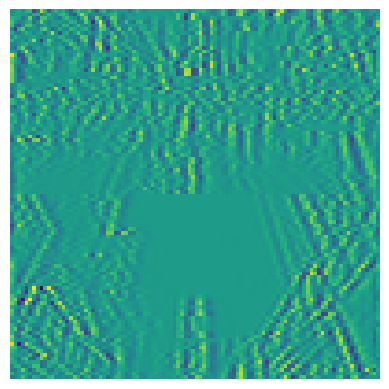

In [3]:
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# 오염된 이미지
plt.imshow(broken_image.view(100, 100))
plt.axis('off')
plt.show()

In [4]:
# 이미지의 노이즈를 추가하는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0 * 0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0) # 텐서 연결
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [6]:
# 손실 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [7]:
# 랜덤 이미지 텐서
random_tensor = torch.randn(10000, dtype = torch.float)
random_tensor

tensor([-0.8724, -1.2534, -1.1186,  ..., -0.1735, -0.0976,  0.6721])

In [8]:
lr = 0.8
for i in range(0,20000):
    # 자동 미분 기능 on
    random_tensor.requires_grad_(True)
    # 이미지에 노이즈 추가
    hypothesis = weird_function(random_tensor)
    # 오차 계산
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    # 자동 미분 기능 off
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.235830307006836
Loss at 1000 = 1.1667371988296509
Loss at 2000 = 0.5514972805976868
Loss at 3000 = 0.3763918876647949
Loss at 4000 = 0.2950364649295807
Loss at 5000 = 0.2463768869638443
Loss at 6000 = 0.21190762519836426
Loss at 7000 = 0.18469296395778656
Loss at 8000 = 0.16166089475154877
Loss at 9000 = 0.14125341176986694
Loss at 10000 = 0.12259924411773682
Loss at 11000 = 0.10517387837171555
Loss at 12000 = 0.08864258974790573
Loss at 13000 = 0.07278189063072205
Loss at 14000 = 0.05743831768631935
Loss at 15000 = 0.042505063116550446
Loss at 16000 = 0.02790902368724346
Loss at 17000 = 0.021157026290893555
Loss at 18000 = 0.02116597816348076
Loss at 19000 = 0.02116752229630947


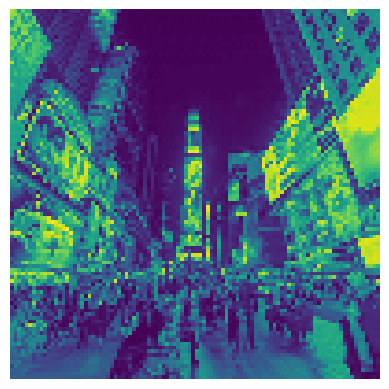

In [9]:
#복원된 이미지
plt.imshow(random_tensor.view(100,100).data)
plt.axis('off')
plt.show()